In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Beskrivande statistik
Inom statistiken har vi en uppsättning verktyg för att kvantifiera hur en datamängd ser ut. Några av dess är
* Medelvärde
* Median
* Varians
* Standardavvikelse
* min/max
* kvantiler


### Medelvärde
Medelvärdet beräknas med hjälp av följande formel:
$$\bar{x} = \frac{1}{n}\sum_{i=1}^{n}x_i.$$
Där $x_i$ är ett värde i datamängden och $n$ är antalet värden i datamängden. Sträcket över $\bar{x}$ är notation för medelvärdet av $x$.


Mean of x = 0.37, when p = 0.4


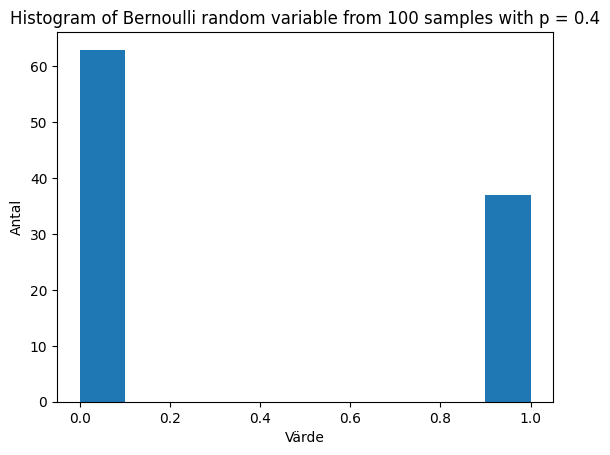

In [2]:
# Simple mean function
def mean(x):
    return np.sum(x) / len(x)

# Create a random variable
p = 0.4
n = 100
x = stats.bernoulli.rvs(p, size=n)   # Bernoulli random variable with p=0.4 => we expect 40% of 1s (successes)

# Compute the mean
print(f"Mean of x = {mean(x)}, when p = {p}")

# Plot the distribution of the random variable
plt.hist(x)
plt.xlabel('Värde')
plt.ylabel('Antal')
plt.title(f'Histogram of Bernoulli random variable from {n} samples with p = {p}')
plt.show()

### Median 
Medianen är det värde som ligger i mitten av datamängden. Om datamängden har ett jämnt antal värden är medianen det medelvärde av de två mittersta värdena.


In [3]:
# Median function
def median(x):
    x_sorted = np.sort(x)
    if len(x) % 2 == 0:
        # Even number of elements => take the average of the two middle elements
        return (x_sorted[len(x) // 2 - 1] + x_sorted[len(x) // 2]) / 2
    else:
        # Odd number of elements => take the middle element
        return x_sorted[len(x) // 2]

# Compute the median
print(f"Median of x = {median(x)}, when p = {p}")

# Varför är det så stor skillnad på medelvärde och median?

Median of x = 0.0, when p = 0.4


## Varians
Variansen är ett mått på hur spridda värdena är från sitt medelvärde i en datamängd. 
Det finns två olika definitioner av variansen. Den första är stickprovsvariansen och den andra är populationens varians. Stickprovsvariansen beräknas med följande formel:
$$s^2 = \frac{1}{n-1}\sum_{i=1}^{n}(x_i - \bar{x})^2.$$

Populationens varians beräknas med följande formel:
$$\sigma^2 = \frac{1}{n}\sum_{i=1}^{n}(x_i - \bar{x})^2.$$

Skillnaden mellan dessa två är att stickprovsvariansen delar med $n-1$ medan populationens varians delar med $n$. Detta beror på att stickprovsvariansen är en uppskattning av populationens varians.

##### OBS!
<ins>När man använder inbyggda funktioner i Python för att beräkna variansen behöver man läsa dokumentationen för att veta vilken formel som används.</ins>

T.ex. används stickprovsvariansen som standard i `pandas` om man utför `df.std()`, medans `numpy` använder populationsvariansen som standard. Vilken som används kan kontrolleras genom att ange `ddof = 0 eller 1` i båda biblioteken. `0` används för populationsvarians och `1` för stickprovsvarians.

 [Dokumentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.std.html) för `pandas` och [dokumentation](https://numpy.org/doc/stable/reference/generated/numpy.std.html) för `numpy`.

#### Stickprovsvarians
Vi använder stickprovsvarians när vi utfört en undersökning med ett urval av en population. Vi kan då inte veta hur populationen ser ut utan vi kan bara säga hur urvalet ser ut. För att kompensera den ökade osäkerheten delar vi med $n-1$ istället för $n$.

* När $n$ är **stort** minskar skillnaden mellan stickprovsvariansen och populationens varians. 
* När $n$ är **litet** ökar osäkerheten i stickprovsvariansen och skillnaden mellan stickprovsvariansen och populationens varians blir större.


#### Populationsvarians
Populationsvarinsen kan vi använd när vårt dataunderlag är hela populationen. Alternativt att vi bara är intresserade av vårt nuvarande dataunderlag och inte hur det skulle se ut om vi hade gjort en annan undersökning med ett annat urval.



In [4]:
# Variance functions
def variance_sample(x):
    return np.sum((x - mean(x)) ** 2) / (len(x) - 1)

def variance_population(x):
    return np.sum((x - mean(x)) ** 2) / len(x)

# Compute the variance
print(f"Sample variance of x = {variance_sample(x)}, when p = {p}")
print(f"Population variance of x = {variance_population(x)}, when p = {p}")

Sample variance of x = 0.23545454545454544, when p = 0.4
Population variance of x = 0.23309999999999997, when p = 0.4


## Standardavvikelse
Standardavvikelsen är kvadratroten ur variansen. Detta gör att standardavvikelsen har samma måttenhet som datamängden vilket gör att standardavvikelsen är lättare att tolka i relation till datamängden.

Standrdavvikelsen har också två olika definitioner. Den första är _stickprovsstandardavvikelsen_ och den andra är _populationens standardavvikelse_. Stickprovsstandardavvikelsen beräknas med följande formel:
$$s = \sqrt{\frac{1}{n-1}\sum_{i=1}^{n}(x_i - \bar{x})^2}.$$

Populationens standardavvikelse beräknas med följande formel:
$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(x_i - \bar{x})^2}.$$

In [5]:
# Standard deviation functions
def std_sample(x):
    return np.sqrt(variance_sample(x))

def std_population(x):
    return np.sqrt(variance_population(x))

# Compute the standard deviation
print(f"Sample standard deviation of x = {std_sample(x)}, when p = {p}")
print(f"Population standard deviation of x = {std_population(x)}, when p = {p}")

Sample standard deviation of x = 0.4852365870939097, when p = 0.4
Population standard deviation of x = 0.4828043081829324, when p = 0.4


Här ser vi att det är mycket lättare att relatera till standardavvikelsen än till variansen. 

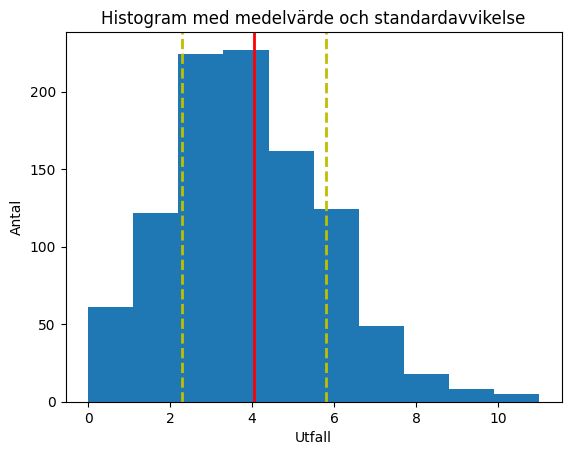

In [6]:
# Simulate a random variable from a binomial distribution
p = 0.2
n = 20
x = stats.binom.rvs(n, p, size=1000)

# x = stats.bernoulli.rvs(p, size=n)  

# Plot the distribution of the Bernoulli random variable x and compare with the standard devition
plt.hist(x)
plt.axvline(mean(x), color='r', linewidth=2)
plt.axvline(mean(x) + std_sample(x), color='y', linestyle='dashed', linewidth=2)
plt.axvline(mean(x) - std_sample(x), color='y', linestyle='dashed', linewidth=2)
plt.ylabel('Antal')
plt.xlabel('Utfall')
plt.title('Histogram med medelvärde och standardavvikelse')
plt.show()



## Min/max
Min och max är de minsta och största värdena i datamängden. Detta är värden som vi kan använda för att få en känsla för hur datamängden ser ut.

In [7]:
# Get minimum and maximum values
x_min = np.min(x)
x_max = np.max(x)

print(f"Minimum value of x = {x_min}")
print(f"Maximum value of x = {x_max}")

Minimum value of x = 0
Maximum value of x = 11


## Kvantiler
Kvantiler är värden som delar upp datamängden i lika stora delar. Om vi t.ex. vill dela upp datamängden i fyra lika stora delar så kan vi använda kvantilerna 0.25, 0.5 och 0.75. Dessa värden är då de värden som delar upp datamängden i fyra lika stora delar.

Kvantiler kan ses som en generalisering av medianen. Medan medianen är det värde som delar upp datamängden i två lika stora delar så kan kvantiler dela upp datamängden i vilket antal delar som helst. 

Man kan också se kvantiler som procentsatser av index hos en sorterad datamängd. Om vi t.ex. vill veta vilket värde som ligger på 25:e procentenhetens plats i en sorterad datamängd så kan vi använda kvantilen 0.25.

När man pratar om jämna procentenheter av kvantiler kan man också benämna detta som _**percentiler**_.


In [8]:
# Calculate the quantiles
def quantile(x, q):
    """Calculate the q-quantile of x

    Args:
        x (np.array): Array of values
        q (float): Quantile to calculate

    Returns:
        scalar: The q-quantile of x
    """
    x_sorted = np.sort(x)
    return x_sorted[int(len(x) * q)]

# Calculate the 0.25-quantile
q = 0.25
print(f"{q}-quantile of x = {quantile(x, q)}")

0.25-quantile of x = 3


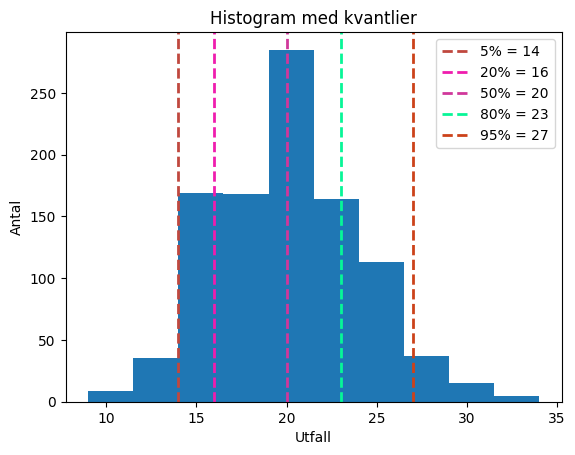

In [9]:
# Simulate a random variable from a binomial distribution
p = 0.2
n = 100
x = stats.binom.rvs(n, p, size=1000)

# # Simulate skewness
# nbr_added = int(n * 0.8)
# skew_ratio = 0.5
# x = np.concatenate((x, np.ones(nbr_added) * mean(x) * np.random.rand(nbr_added) * skew_ratio))

# Calculate quantiles
quantiles_slice_where = np.array([0.05, 0.2, 0.5, 0.8, 0.95])
quantiles_slice = [quantile(x, quantiles_slice) for quantiles_slice in quantiles_slice_where]

# Make a string with % of the quantiles
quantiles_slice_str = [f"{quantiles_slice_where[i]:.0%} = {quantiles_slice[i]}" for i in range(len(quantiles_slice_where))]

# Plot quantiles
plt.hist(x)
for quan in quantiles_slice:
    plt.axvline(quan, linestyle='dashed', color=np.random.rand(3,), linewidth=2)
plt.ylabel('Antal')
plt.xlabel('Utfall')
plt.title('Histogram med kvantlier')
plt.legend(quantiles_slice_str)
plt.show()

## Beskrivande statistik med pandas
I pandas kan vi använda oss av funktioner för att beräkna beskrivande statistik på datamängder. Låt oss åter igen använda `iris`-datamängden för att illustrera några av de vanligaste statistiska måtten:

* `mean` - medelvärde
* `median` - median
* `std` - standardavvikelse
* `min` - minsta värdet
* `max` - största värdet
* `quantile` - kvantiler



In [10]:
import pandas as pd
data = pd.read_csv('data/iris.csv')

# Show the mean of the data for each class using groupby
print(f"\nMean of the data for each class: \n{data.groupby('class').mean()}\n")



Mean of the data for each class: 
                 sepallength  sepalwidth  petallength  petalwidth
class                                                            
Iris-setosa            5.006       3.418        1.464       0.244
Iris-versicolor        5.936       2.770        4.260       1.326
Iris-virginica         6.588       2.974        5.552       2.026



In [11]:
# Show median of the data for each class using group
print(f"\nMedian of the data for each class: \n{data.groupby('class').median()}\n")


Median of the data for each class: 
                 sepallength  sepalwidth  petallength  petalwidth
class                                                            
Iris-setosa              5.0         3.4         1.50         0.2
Iris-versicolor          5.9         2.8         4.35         1.3
Iris-virginica           6.5         3.0         5.55         2.0



In [12]:
# Show the standard deviation of the data for each class using group
print(f"\nStandard deviation of the data for each class: \n{data.groupby('class').std()}\n")


Standard deviation of the data for each class: 
                 sepallength  sepalwidth  petallength  petalwidth
class                                                            
Iris-setosa         0.352490    0.381024     0.173511    0.107210
Iris-versicolor     0.516171    0.313798     0.469911    0.197753
Iris-virginica      0.635880    0.322497     0.551895    0.274650



In [13]:
# Calculate quantiles of the data for each class using group
print(f"\nQuantiles of the data for each class: \n{data.groupby('class').quantile([0.05, 0.25, 0.50, 0.75, 0.95])}\n")


Quantiles of the data for each class: 
                      sepallength  sepalwidth  petallength  petalwidth
class                                                                 
Iris-setosa     0.05        4.400       3.000        1.200       0.100
                0.25        4.800       3.125        1.400       0.200
                0.50        5.000       3.400        1.500       0.200
                0.75        5.200       3.675        1.575       0.300
                0.95        5.610       4.055        1.700       0.400
Iris-versicolor 0.05        5.045       2.245        3.390       1.000
                0.25        5.600       2.525        4.000       1.200
                0.50        5.900       2.800        4.350       1.300
                0.75        6.300       3.000        4.600       1.500
                0.95        6.755       3.200        4.900       1.600
Iris-virginica  0.05        5.745       2.500        4.845       1.545
                0.25        6.225    

#### df.describe()
`df.describe()` är en funktion som ger oss en sammanfattning av datamängden. Funktionen ger oss bland annat medelvärde, median, standardavvikelse, min, max och kvantiler. Genom denna funktion kan vi få en bra överblick av datamängden med en rad kod.

In [14]:
data.describe()

,sepallength,sepalwidth,petallength,petalwidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## NaN-värden
Ibland saknas mätvärden i datamängden. Dessa brukar ofta dyka upp som `NaN`-värden. `NaN` står för _Not a Number_ och är ett sätt att representera att ett värde saknas. Beroende på hur datamängden är konstruerad kan andra värden också representera att ett värde saknas. T.ex. kan `0` eller `-1` representera att ett värde saknas. 

`NaN`-värden kan vara problematiska när vi vill beräkna statistiska mått. Om vi t.ex. vill beräkna medelvärdet av en datamängd så kommer `NaN`-värden att påverka resultatet. Detta är något som vi måste tänka på när vi arbetar med datamängder.

Låt oss nu se hur vi kan hantera `NaN`-värden i pandas.

In [15]:
# Corupt the data with NaN values
start = 0
stop = 3
data_corrupt = data.copy()
data_corrupt.iloc[start:stop, 0:-1] = np.nan

data_corrupt.head(7)

,sepallength,sepalwidth,petallength,petalwidth,class
0,NaN,NaN,NaN,NaN,Iris-setosa
1,NaN,NaN,NaN,NaN,Iris-setosa
2,NaN,NaN,NaN,NaN,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa


Ett sett att upptäcka `NaN`-värden är att använda funktionen `df.isna()`. Funktionen returnerar en datamängd med `True` och `False`-värden där `True` representerar att ett värde är `NaN` och `False` representerar att ett värde inte är `NaN`. Låt oss använda `df.isna()` för att se om det finns några `NaN`-värden i `iris`-datamängden:



In [16]:
# Check for NaN values
data_corrupt.isna()


,sepallength,sepalwidth,petallength,petalwidth,class
0,True,True,True,True,False
1,True,True,True,True,False
2,True,True,True,True,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


Det finns olika sätt att hantera dessa `NaN`-värden. Vi kan t.ex. ta bort alla rader som innehåller `NaN`-värden. Detta kan vi göra med funktionen `df.dropna()`. Låt oss använda `df.dropna()` för att ta bort alla rader som innehåller `NaN`-värden:

In [17]:
# Drop rows with NaN values
data_corrupt.dropna()

,sepallength,sepalwidth,petallength,petalwidth,class
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Vi kan också fylla i `NaN`-värden med ett annat värde. Detta kan vi göra med funktionen `df.fillna()`. Låt oss använda `df.fillna()` för att fylla i alla `NaN`-värden med värdet `0`:

In [18]:
data_corrupt.fillna(0)

,sepallength,sepalwidth,petallength,petalwidth,class
0,0.0,0.0,0.0,0.0,Iris-setosa
1,0.0,0.0,0.0,0.0,Iris-setosa
2,0.0,0.0,0.0,0.0,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### Droppa kolumner
Vi kan också ta bort kolumner som innehåller `NaN`-värden. Detta kan vi göra med funktionen `df.dropna(axis=1)`. Låt oss använda `df.dropna(axis=1)` för att ta bort kolumnerna som innehåller `NaN`-värden:

In [19]:
# Drop columns with NaN values
data_corrupt.dropna(axis=1)

,class
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica
